In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')
from pose_graph_partitioning.pose_graph import *
from pose_graph_partitioning.pose_graph_partitioning import *
from simulate_utils import ATE

plt.rc("figure", figsize=(10,10))
def compare(groundtruth_file, results, inputs=None, ceres_res=None, show=True, show_on_same_plot=True):
    pg_gt = PoseGraph()
    pg_gt.read_g2o_single(groundtruth_file)
    pg_res = PoseGraph()
    pg_res.read_g2o_folder(results)
    ate_T, ate_rot = ATE(pg_gt, pg_res)
    print(f"ATE of result {ate_T:.2f} {ate_rot*57.3:.2f}deg") 
    partitioning(pg_res, "vol", agent_num=1, show=False, method="union")
    if inputs is not None:
        pg_input = PoseGraph()
        pg_input.read_g2o_folder(inputs)
        ate_T, ate_rot = ATE(pg_gt, pg_input)
        partitioning(pg_input, "vol", agent_num=1, show=False, method="union")
        print(f"ATE of input {ate_T:.2f} {ate_rot*57.3:.2f}deg") 
    if ceres_res is not None:
        pg_ceres = PoseGraph()
        pg_ceres.read_g2o_single(ceres_res)
        ate_T, ate_rot = ATE(pg_ceres, pg_gt)
        print(f"ATE of ceres {ate_T:.2f} {ate_rot*57.3:.2f}deg") 
    if show:
        if inputs is not None:
            ax = pg_input.show("Input", clear=False, show_edges=False)
        else:
            ax = None
        if ceres_res is not None:
            if not show_on_same_plot:
                ax = None
            ax = pg_ceres.show("ceres", ax=ax, clear=False, show_edges=False)
        if not show_on_same_plot:
            ax = None
        ax = pg_gt.show("GT", ax=ax, show_edges=False, clear=False)
        if not show_on_same_plot:
            ax = None
        pg_res.show("Res", ax=ax, clear=False, show_edges=False)
        plt.show()

Total agents 5 keyframes 1661 edges 0 inter edge 0 comm_vol 0 keyframes 167<->498
ATE of result 1.34 0.70deg
New partion obj -1 agents 1 keyframes 1661<->1661 inter edges 0 comm_vol 0
Total agents 5 keyframes 1661 edges 6275 inter edge 3246 comm_vol 1673 keyframes 167<->498
New partion obj -1 agents 1 keyframes 1661<->1661 inter edges 0 comm_vol 0
ATE of input 19.20 12.64deg
ATE of ceres 0.06 0.02deg


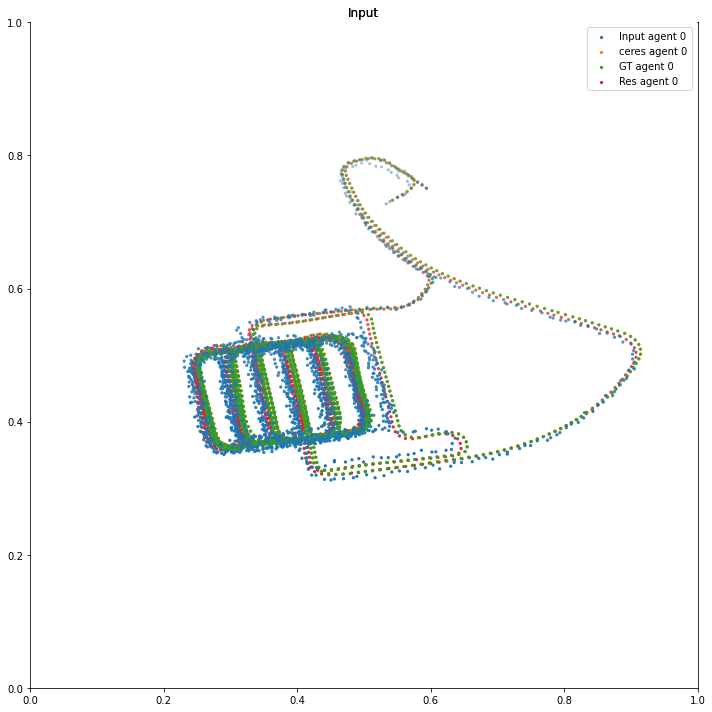

In [2]:
groundtruth_file = '/home/xuhao/data/pgo/parking-garage/groundtruth.g2o'
results = '/home/xuhao/data/pgo/parking-garage/output'
inputs = '/home/xuhao/data/pgo/parking-garage/input'
ceres_res = "/home/xuhao/data/pgo/parking-garage/ceres-output.g2o"

compare(groundtruth_file, results, inputs, ceres_res=ceres_res, show_on_same_plot=True)

In [ ]:
groundtruth_file = '/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/groundtruth.g2o'
results = None #'/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/output'
inputs = '/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/input'
ceres_res = "/home/xuhao/data/d2slam/pgo/input_INTEL_g2o/ceres-output.g2o"
compare(groundtruth_file, results, inputs, ceres_res=ceres_res)